<h1><font color='blue'>Title: PREDICT THE CONSTRUCTION PERMIT STATUS</font> </h1><br>
<h2><font color='black'>Abstract</font><br>
<h6><font color='black'>The main purpose of any building, shed, or electrical permits is to ensure safety. By enforcing proper safety standards, you and other occupants of a space are guaranteed the best chance to avoid any accidents or issues during the construction process. In my project, I looked at construction data from the "Washington DC Construction permit dataset," which contains information on application requesting for permit in the city of Washington DC from the year 2017 to 2021.

I looked at patterns over time, trends, and  corelation between variables using the matplotlib library. Encoding categorical variables, feature selection, data standardization, and scaling are performed as part of .The final phase is modeling, building machine learning algorithms to predict labels. The model must predict the "ISSUED" label in order to identify the possibility of the application getting through so that the chance of particular application to be rejected can be found in prior without the government officials taking much efforts. I want to identity permits that are likely to be not issued in order to provide real-time feedback to submitters and/or the staff reviewing the permits
    </font> <h6>
    


### Link to Data Source
https://opendata.dc.gov/datasets/construction-permits-in-2020/explore?location=38.916792%2C-77.022175%2C11.73&showTable=true

 Every record identifies a construction permits information using various features. These attributes include.
 0   X                  
 1   Y                    
 2   OBJECTID              
 3   APPLICATIONDATE       
 4   ISEXCAVATION         
 5   ISFIXTURE            
 6   ISPAVING               
 7   ISLANDSCAPING         
 8   ISPROJECTIONS         
 9   ISPSRENTAL             
 10  TRACKINGNUMBER         
 11  PERMITNUMBER           
 12  INTAKEDATE             
 13  ISSUEDATE             
 14  EFFECTIVEDATE          
 15  EXPIRATIONDATE        
 16  XCOORD                
 17  YCOORD                
 18  STATUS                
 19  WLFULLADDRESS         
 20  PERMITTEENAME          
 21  OWNERNAME             
 22  CONTRACTORNAME        
 23  WORKDETAIL            
 24  READYFORREVIEWDATE    
 25  APPLICANTCOMPANYNAME   
 26  LATITUDE              
 27  LONGITUDE             
 28  GIS_ID               
 29  GLOBALID              
 30  CREATOR               
 31  CREATED               
 32  EDITOR               
 33  EDITED
  </h6>

## Imports
** Import pandas, numpy, matplotlib,and seaborn.**

In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
%matplotlib inline
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot



## Reading the Data 



In [280]:
data = pd.read_csv("Construction_Permits_in_2020.csv")

*Check the head of data, and check out its info() and describe() methods.**

In [281]:
data.shape

(21522, 34)

In [282]:
data.head()

X          Y  OBJECTID         APPLICATIONDATE ISEXCAVATION  \
0 -76.955760  38.895931  90855698  2020/01/10 12:17:46+00            T   
1 -77.006316  38.906668  90855699  2019/12/26 14:16:46+00            T   
2 -76.993523  38.837742  90856000  2019/09/16 13:38:08+00            F   
3 -77.043455  38.904708  90856194  2019/04/27 15:08:40+00            F   
4 -76.998446  38.904071  90856195  2019/04/27 15:10:44+00            F   

  ISFIXTURE ISPAVING ISLANDSCAPING ISPROJECTIONS ISPSRENTAL  ...  \
0         F        F             F             F          F  ...   
1         F        F             F             F          F  ...   
2         F        F             F             F          F  ...   
3         T        F             F             F          F  ...   
4         T        F             F             F          F  ...   

       READYFORREVIEWDATE            APPLICANTCOMPANYNAME   LATITUDE  \
0  2020/01/10 12:19:02+00  Potomac Electric Power Company  38.895923   
1  2020/01/02 18:33:26+00   DFM Development Services, LLC  38.906660   
2  2019/09/16 13:38:56+00  Potomac Electric Power Company  38.837734   
3  2019/04/29 19:27:05+00    Crown Castle NG Atlantic LLC  38.904700   
4  2019/04/29 19:21:25+00    Crown Castle NG Atlantic LLC  38.904063   

   LONGITUDE GIS_ID                                GLOBALID  CREATOR  CREATED  \
0 -76.955757    NaN  {D18A7D09-8F82-5BE0-E053-792F520A847C}      NaN      NaN   
1 -77.006314    NaN  {D18A7D09-8F83-5BE0-E053-792F520A847C}      NaN      NaN   
2 -76.993521    NaN  {D18A7D09-90B0-5BE0-E053-792F520A847C}      NaN      NaN   
3 -77.043453    NaN  {D18A7D09-9172-5BE0-E053-792F520A847C}      NaN      NaN   
4 -76.998444    NaN  {D18A7D09-9173-5BE0-E053-792F520A847C}      NaN      NaN   

  EDITOR EDITED  
0    NaN    NaN  
1    NaN    NaN  
2    NaN    NaN  
3    NaN    NaN  
4    NaN    NaN  

[5 rows x 34 columns]

In [134]:
data.describe()

X             Y      OBJECTID  TRACKINGNUMBER  \
count  21522.000000  21522.000000  2.152200e+04    21522.000000   
mean     -77.013002     38.911776  9.097569e+07   351937.877799   
std        0.037559      0.029650  2.778327e+04     8162.371864   
min      -77.113391     38.813658  9.085570e+07   199050.000000   
25%      -77.034825     38.895653  9.097633e+07   346631.250000   
50%      -77.014690     38.910532  9.098181e+07   352306.500000   
75%      -76.989416     38.930827  9.098744e+07   358300.750000   
max      -76.910140     38.993526  9.101347e+07   372573.000000   

              XCOORD         YCOORD      LATITUDE     LONGITUDE  GIS_ID  \
count   21522.000000   21522.000000  21522.000000  21522.000000     0.0   
mean   398873.165977  138212.395414     38.911768    -77.013000     NaN   
std      3257.300412    3291.593235      0.029650      0.037559     NaN   
min    390168.990000  127319.990000     38.813651    -77.113389     NaN   
25%    396979.900000  136423.970000     38.895645    -77.034823     NaN   
50%    398726.550000  138074.250000     38.910524    -77.014688     NaN   
75%    400918.417500  140327.082500     38.930819    -76.989414     NaN   
max    407795.708421  147287.490000     38.993518    -76.910138     NaN   

       CREATOR  CREATED  EDITOR  EDITED  
count      0.0      0.0     0.0     0.0  
mean       NaN      NaN     NaN     NaN  
std        NaN      NaN     NaN     NaN  
min        NaN      NaN     NaN     NaN  
25%        NaN      NaN     NaN     NaN  
50%        NaN      NaN     NaN     NaN  
75%        NaN      NaN     NaN     NaN  
max        NaN      NaN     NaN     NaN

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21522 entries, 0 to 21521
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   X                     21522 non-null  float64
 1   Y                     21522 non-null  float64
 2   OBJECTID              21522 non-null  int64  
 3   APPLICATIONDATE       21522 non-null  object 
 4   ISEXCAVATION          21522 non-null  object 
 5   ISFIXTURE             21522 non-null  object 
 6   ISPAVING              21522 non-null  object 
 7   ISLANDSCAPING         21522 non-null  object 
 8   ISPROJECTIONS         21522 non-null  object 
 9   ISPSRENTAL            21522 non-null  object 
 10  TRACKINGNUMBER        21522 non-null  int64  
 11  PERMITNUMBER          17638 non-null  object 
 12  INTAKEDATE            21522 non-null  object 
 13  ISSUEDATE             17638 non-null  object 
 14  EFFECTIVEDATE         21522 non-null  object 
 15  EXPIRATIONDATE     

##### checking the  unique values in status

In [136]:
data['STATUS'].unique()

array(['Permit Expired', 'Cancel/Withdrawn', 'Denied',
       'Approved (Pending Payment)', 'Resubmitted', 'Assigned',
       'Revise and Resubmit', 'Issued', 'Reopened', 'Revoked',
       'Pending Assignment', 'Suspended'], dtype=object)

## Exploratory Data Analysis



In [137]:
data['STATUS'].value_counts()

Permit Expired                17187
Cancel/Withdrawn               2812
Issued                          434
Approved (Pending Payment)      413
Revise and Resubmit             357
Denied                          226
Assigned                         49
Reopened                         15
Resubmitted                      12
Suspended                         8
Revoked                           6
Pending Assignment                3
Name: STATUS, dtype: int64

#### Grouping  status ‘Cancel/Withdrawn’, ‘Revise/Resubmit’, ‘Denied’, ’Suspended’, ‘Revoked’  into Not issued and Approved into Issued

In [138]:
listt =  ['Cancel/Withdrawn', 'Denied','Revise and Resubmit','Revoked', 'Pending Assignment', 'Suspended']
data.loc[data['STATUS'] == 'Cancel/Withdrawn' , 'STATUS'] = 'NOT ISSUED'
data.loc[data['STATUS'] == 'Denied' , 'STATUS'] = 'NOT ISSUED'
data.loc[data['STATUS'] == 'Revise and Resubmit' , 'STATUS'] = 'NOT ISSUED'
data.loc[data['STATUS'] == 'Revoked' , 'STATUS'] = 'NOT ISSUED'
data.loc[data['STATUS'] == 'Pending Assignment' , 'STATUS'] = 'NOT ISSUED'
data.loc[data['STATUS'] == 'Suspended' , 'STATUS'] = 'NOT ISSUED'
data.loc[data['STATUS'] == 'Approved (Pending Payment)', 'STATUS'] = 'Issued'

In [139]:
values = ['Assigned' , 'Reopened' , 'Resubmitted' ,'Permit Expired']
data = data[data.STATUS.isin(values) == False]
data['STATUS'].value_counts()

NOT ISSUED    3412
Issued         847
Name: STATUS, dtype: int64

### Check for Null value counts in each feature

In [140]:
col_list = data.columns
data[col_list].isnull().sum()

X                          0
Y                          0
OBJECTID                   0
APPLICATIONDATE            0
ISEXCAVATION               0
ISFIXTURE                  0
ISPAVING                   0
ISLANDSCAPING              0
ISPROJECTIONS              0
ISPSRENTAL                 0
TRACKINGNUMBER             0
PERMITNUMBER            3817
INTAKEDATE                 0
ISSUEDATE               3817
EFFECTIVEDATE              0
EXPIRATIONDATE             0
XCOORD                     0
YCOORD                     0
STATUS                     0
WLFULLADDRESS              0
PERMITTEENAME            347
OWNERNAME               1640
CONTRACTORNAME          3636
WORKDETAIL                 0
READYFORREVIEWDATE       518
APPLICANTCOMPANYNAME    1369
LATITUDE                   0
LONGITUDE                  0
GIS_ID                  4259
GLOBALID                   0
CREATOR                 4259
CREATED                 4259
EDITOR                  4259
EDITED                  4259
dtype: int64

### Dropping non imputable columns , unique values and date columns

In [141]:
print('Current rows and columns', data.shape)
data.drop(['EDITED' , 'EDITOR' , 'CREATOR' , 'CREATED' ,
           'CONTRACTORNAME' , 'PERMITTEENAME' , 'OWNERNAME',
           'APPLICANTCOMPANYNAME' , 'GIS_ID']  , axis = 1, inplace = True)

data.drop(['PERMITNUMBER' , 'ISSUEDATE' , 'READYFORREVIEWDATE']  , axis = 1, inplace = True)
data.drop(['WLFULLADDRESS' , 'WORKDETAIL' , 'GLOBALID'] , axis = 1, inplace = True)
data.drop(['OBJECTID']  , axis = 1, inplace = True)
print('shape after NA columns and non imputable columns', data.shape)


Current rows and columns (4259, 34)
shape after NA columns and non imputable columns (4259, 18)


In [142]:

#data['APPLICATIONDATE'] = pd.to_datetime(data['APPLICATIONDATE'], format='%Y-%m-%d %H:%M:%S')
#data['year'] = data['APPLICATIONDATE'].dt.year
#data['month'] = data['APPLICATIONDATE'].dt.month
#data['day'] = data['APPLICATIONDATE'].dt.day
#data['date'] = data['APPLICATIONDATE'].dt.date
#data['day_name'] = data['APPLICATIONDATE'].dt.day_name()
#data['weekday'] = data['APPLICATIONDATE'].dt.weekday
#data['quarter'] = data['APPLICATIONDATE'].dt.quarter
#data['month_name'] = data['month'].apply(lambda x: calendar.month_abbr[x])

In [143]:
data.drop(['APPLICATIONDATE', 'EXPIRATIONDATE' , 'EFFECTIVEDATE' , 'INTAKEDATE'] , axis = 1, inplace = True)

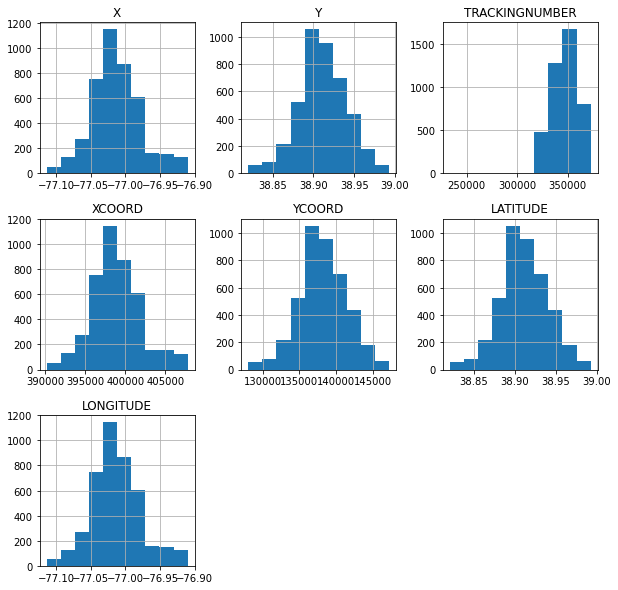

In [144]:
plt.rcParams["figure.figsize"] = (10,10)
data.hist()
plt.show()


In [145]:
data.shape

(4259, 14)

#### Check if coordinates are of DC

In [147]:
xmin = -77.119759
ymin = 38.791645
xmax = -76.909395
ymax = 38.99511
#Exploring Latitude and Longitude
#we'll remove all rows outside of this range

print('Current rows:', data.shape[0])
data = data[(((data.LATITUDE >= -77.119759) & (data.LONGITUDE <= 38.791645)) | 
            ((data.LONGITUDE <= -76.909395) & (data.LONGITUDE >= 38.99511)))]
print('Rows after removing out of box points:', data.shape[0])

Current rows: 4259
Rows after removing out of box points: 4259


#### Label encode Target variable Status

In [210]:
le =LabelEncoder()
data['STATUS'] = le.fit_transform(data['STATUS'])

#### Plot issued and not issues

In [211]:
import folium                           # Mapping application
from folium import plugins              # Used to plot routes on a map

folium_map = folium.Map(location = [50,  -76], zoom_start=13, tiles="cartodbpositron")
for index,row in data.iterrows():  
    folium.CircleMarker(location=(row['LATITUDE'], row['LONGITUDE']), color='#FF0000'if row["STATUS"]=="NOT ISSUED" else "#0A8A9F", radius=5, weight= (0.5) , fill=True).add_child(folium.Popup(row['STATUS'])).add_to(folium_map)
folium_map

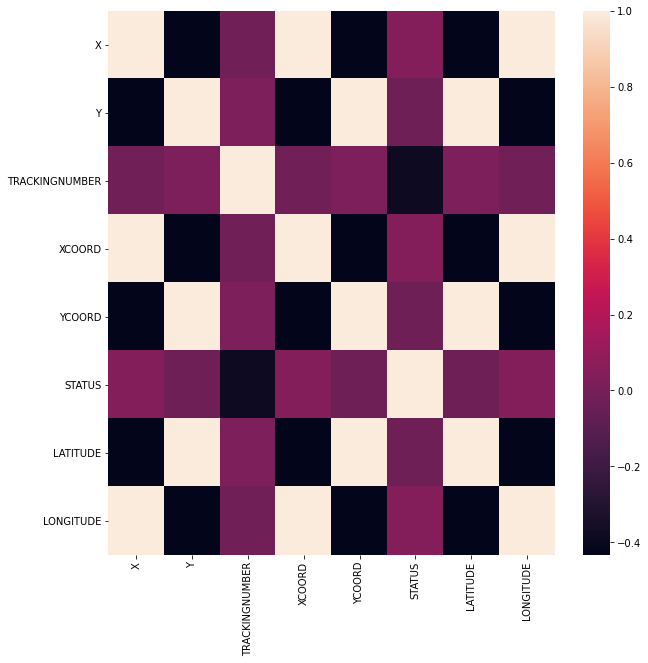

In [182]:
import seaborn as sns
sns.heatmap(data.corr())
plt.show()

### Feature Engineering like one hot encoding , scaling , label encoding

In [183]:
numbers=['X', 'Y', 'TRACKINGNUMBER' , 'XCOORD', 'YCOORD',
        'LATITUDE', 'LONGITUDE']
categories=['ISEXCAVATION', 'ISFIXTURE', 'ISPAVING',
       'ISLANDSCAPING', 'ISPROJECTIONS', 'ISPSRENTAL',]


In [235]:
X=data.drop(['STATUS'],axis=1)
y=data.STATUS
data.head()

X          Y ISEXCAVATION ISFIXTURE ISPAVING ISLANDSCAPING  \
3 -77.043455  38.904708            F         T        F             F   
4 -76.998446  38.904071            F         T        F             F   
5 -77.007494  38.907246            F         T        F             F   
6 -77.025991  38.914462            F         T        F             F   
7 -77.033250  38.915579            F         T        F             F   

  ISPROJECTIONS ISPSRENTAL  TRACKINGNUMBER     XCOORD     YCOORD  STATUS  \
3             F          F          330462  396230.99  137427.94       1   
4             F          F          330463  400134.98  137356.32       1   
5             F          F          330471  399350.19  137708.83       1   
6             F          F          330485  397746.09  138510.18       1   
7             F          F          330488  397116.56  138634.40       1   

    LATITUDE  LONGITUDE  
3  38.904700 -77.043453  
4  38.904063 -76.998444  
5  38.907238 -77.007492  
6  38.914454 -77.025989  
7  38.915572 -77.033248

In [236]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
print(f'Training examples: {X_train.shape[0]}')
print(f'Test examples: {X_test.shape[0]}')

Training examples: 2555
Test examples: 1704


In [237]:
data.head(5)

X          Y ISEXCAVATION ISFIXTURE ISPAVING ISLANDSCAPING  \
3 -77.043455  38.904708            F         T        F             F   
4 -76.998446  38.904071            F         T        F             F   
5 -77.007494  38.907246            F         T        F             F   
6 -77.025991  38.914462            F         T        F             F   
7 -77.033250  38.915579            F         T        F             F   

  ISPROJECTIONS ISPSRENTAL  TRACKINGNUMBER     XCOORD     YCOORD  STATUS  \
3             F          F          330462  396230.99  137427.94       1   
4             F          F          330463  400134.98  137356.32       1   
5             F          F          330471  399350.19  137708.83       1   
6             F          F          330485  397746.09  138510.18       1   
7             F          F          330488  397116.56  138634.40       1   

    LATITUDE  LONGITUDE  
3  38.904700 -77.043453  
4  38.904063 -76.998444  
5  38.907238 -77.007492  
6  38.914454 -77.025989  
7  38.915572 -77.033248

#### Create preprocessing pipeline

In [238]:
from sklearn.pipeline import Pipeline
numerical_pipeline = Pipeline([('impute_missing', SimpleImputer(missing_values = np.nan ,strategy='mean')),
                           ('standardize_num', StandardScaler())])

categorical_pipeline = Pipeline([('impute_missing_cats', SimpleImputer(missing_values = np.nan , strategy='most_frequent')),
                          ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore',  sparse=False))])

processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', numerical_pipeline, numbers),
                                                      ('create_dummies', categorical_pipeline, categories)
                                                      ])

#### Create model pipelines

In [239]:
p1 = Pipeline([('processing', processing_pipeline),
               ('logreg', LogisticRegression())])

p2 = Pipeline([('processing', processing_pipeline),
               ('tree', DecisionTreeClassifier())])

p3 = Pipeline([('processing', processing_pipeline),
               ('svc', SVC())])

labs = ['Logistic Regression', 'Decision Tree', 'SVM']
clfs = [p1, p2, p3]
#clfs = zip(labs, clfs)

In [240]:
# Fit the pipelines
for pipe in clfs:
    pipe.fit(X_train, y_train)    

### Logistic Regression

In [241]:
params = {
    'logreg__solver': ['liblinear', 'saga'], 'logreg__C':[0.1, 1,10,100],
   'logreg__penalty':['l1','l2']
}
Log_reg_grid_search = GridSearchCV(estimator=p1, 
                           param_grid=params, 
                            scoring = "roc_auc")
Log_reg_grid_search=Log_reg_grid_search.fit(X_train, y_train)
Log_reg_grid_search.score(X_test, y_test)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the

0.8117283686730506

In [242]:
Log_reg_y_testp = Log_reg_grid_search.predict(X_test)
Log_reg_y_testpr_lr = Log_reg_grid_search.predict_proba(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, Log_reg_y_testp))

              precision    recall  f1-score   support

           0       0.65      0.29      0.40       344
           1       0.84      0.96      0.90      1360

    accuracy                           0.83      1704
   macro avg       0.75      0.63      0.65      1704
weighted avg       0.80      0.83      0.80      1704



In [243]:
Log_reg_grid_search.best_params_

{'logreg__C': 100, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}

In [244]:
from sklearn.metrics import confusion_matrix
y_testpr_rf = Log_reg_grid_search.predict(X_test)
print(confusion_matrix(y_test, y_testpr_rf))

[[ 100  244]
 [  53 1307]]


### 2.Decision Tree

In [245]:
from sklearn.model_selection import GridSearchCV
params = {
    'tree__max_depth': [2, 3, 5, 10, 20],
    'tree__min_samples_leaf': [5, 10, 20, 50, 100],
    'tree__criterion': ["gini", "entropy"]
}
tree_grid_search = GridSearchCV(estimator=p2, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "roc_auc")
tree_grid_search=tree_grid_search.fit(X_train, y_train)
tree_grid_search.score(X_test, y_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.0s finished


0.85047024623803

In [246]:
tree_y_testp = tree_grid_search.predict(X_test)
tree_y_testpr = tree_grid_search.predict_proba(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, tree_y_testp))

              precision    recall  f1-score   support

           0       0.64      0.38      0.48       344
           1       0.86      0.94      0.90      1360

    accuracy                           0.83      1704
   macro avg       0.75      0.66      0.69      1704
weighted avg       0.81      0.83      0.81      1704



In [247]:
tree_grid_search.best_params_

{'tree__criterion': 'entropy',
 'tree__max_depth': 10,
 'tree__min_samples_leaf': 50}

In [248]:
from sklearn.metrics import confusion_matrix

y_testpr_rf = Log_reg_grid_search.predict(X_test)

print(confusion_matrix(y_test, y_testpr_rf))

[[ 100  244]
 [  53 1307]]


### 3.Support Vector Classifier

In [249]:
params = {
    'svc__kernel': ['linear', 'poly', 'rbf']}

svc_grid_search = GridSearchCV(estimator=p3, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "roc_auc")
svc_grid_search=svc_grid_search.fit(X_train, y_train)
svc_grid_search.score(X_test, y_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 4 folds for each of 3 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.2s finished


0.822935191518468

In [250]:
svc_grid_search.best_params_

{'svc__kernel': 'poly'}

In [251]:
svc_y_testp = svc_grid_search.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, svc_y_testp))

              precision    recall  f1-score   support

           0       0.71      0.47      0.57       344
           1       0.88      0.95      0.91      1360

    accuracy                           0.85      1704
   macro avg       0.79      0.71      0.74      1704
weighted avg       0.84      0.85      0.84      1704



In [252]:
from sklearn.metrics import confusion_matrix
y_testpr_rf = Log_reg_grid_search.predict(X_test)
print(confusion_matrix(y_test, y_testpr_rf))

[[ 100  244]
 [  53 1307]]


### 4.Sklearn neural network

In [253]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
import datetime

st = datetime.datetime.now()
mlp = MLPClassifier(hidden_layer_sizes=(8,6,1), max_iter=300,activation = 'tanh',solver='adam',random_state=123)
pipemlp = Pipeline([('processing', processing_pipeline),('mlp',mlp)])

pipemlp.fit(X_train, y_train)
en = datetime.datetime.now()

print(f'Training set score: {pipemlp.score(X_train, y_train):.2%}')
print(f'Test score: {pipemlp.score(X_test, y_test):.2%}')
print(f'\nTraining completed in {en-st}')

Training set score: 85.83%
Test score: 85.27%

Training completed in 0:00:01.810168


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [254]:
NN_y_testp = pipemlp.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, NN_y_testp))

              precision    recall  f1-score   support

           0       0.69      0.48      0.57       344
           1       0.88      0.95      0.91      1360

    accuracy                           0.85      1704
   macro avg       0.79      0.71      0.74      1704
weighted avg       0.84      0.85      0.84      1704



In [255]:
print("Logistic Regression score:"+str(Log_reg_grid_search.score(X_test, y_test)))
print("Decision Tree score:"+str(tree_grid_search.score(X_test, y_test)))
print("Support Vector Classifier score:"+str(svc_grid_search.score(X_test,y_test)))
print("Neural Network score:"+str(pipemlp.score(X_test,y_test)))


Logistic Regression score:0.8117283686730506
Decision Tree score:0.85047024623803
Support Vector Classifier score:0.822935191518468
Neural Network score:0.8526995305164319


### Comparison of models

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.626
SVC: ROC AUC=0.711
Tree: ROC AUC=0.663
Neural Network: ROC AUC=0.714


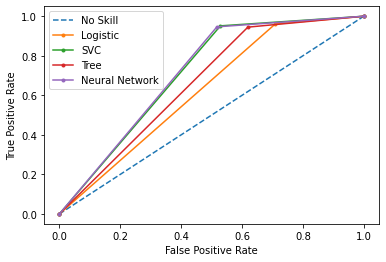

In [276]:
tree_probs = tree_grid_search.predict(X_test)
svc_probs = svc_grid_search.predict(X_test)
lr_probs = Log_reg_grid_search.predict(X_test)
nn_probs = pipemlp.predict(X_test)

# keep probabilities for the positive outcome only
#lr_probs = lr_probs[]
# calculate scores
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
svc_auc = roc_auc_score(y_test, svc_probs)
tree_auc = roc_auc_score(y_test, tree_probs)
nn_auc = roc_auc_score(y_test, nn_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('SVC: ROC AUC=%.3f' % (svc_auc))
print('Tree: ROC AUC=%.3f' % (tree_auc))
print('Neural Network: ROC AUC=%.3f' % (nn_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_probs)
tree_fpr, tree_tpr, _ = roc_curve(y_test, tree_probs)
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(svc_fpr, svc_tpr, marker='.', label='SVC')
pyplot.plot(tree_fpr, tree_tpr, marker='.', label='Tree')
pyplot.plot(nn_fpr, nn_tpr, marker='.', label='Neural Network')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#### Observations:

<h6><font color='black'> Regarding ROC AUC score , SVC and Neural network is more than other algorithms. Accuracy is better for Neural Network and Tree. More than any Machine Learning algorithms , Neural Network is better in regards with this data. </font> </h6>

####  Further works:

<h6><font color='black'> 
    
    
    More analysis with respect to four date fields in the dataset.                                       
    
    Instead of just predicting two labels , (Issued and Not issued ) predict more specific class</font> </h6>


<h2><font color=black > References:</h2></font>

https://github.com/appliedecon/data602-lectures

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
